In [ ]:
pip install plantcv

     |████████████████████████████████| 215kB 8.5MB/s 
     |████████████████████████████████| 49.0MB 88kB/s 
     |████████████████████████████████| 655kB 64.7MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=ee2417226a8ddfe2e270c9062e1ef37c0441144739610aa985901e2514a42776
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: tensorflow-probability 0.11.0 has requirement cloudpickle==1.3, but you'll have cloudpickle 1.6.0 which is incompatible.
ERROR: gym 0.17.2 has requirement cloudpickle<1.4.0,>=1.2.0, but you'll have cloudpickle 1.6.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled c

In [ ]:
pip install tensorflow-probability==0.11.0

ERROR: distributed 2.27.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: cloudpickle 1.6.0
    Uninstalling cloudpickle-1.6.0:
      Successfully uninstalled cloudpickle-1.6.0


In [ ]:
pip install cloudpickle

In [ ]:
import cv2
from plantcv import plantcv as pcv

In [ ]:
class options:
    def __init__(self):
        self.image = "/content/plantimg/coco.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "./nir_tutorial_results"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


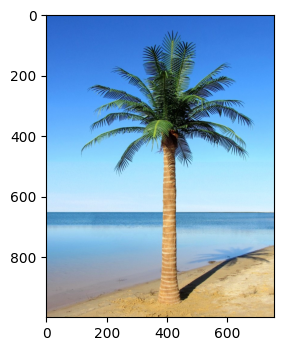

In [ ]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)

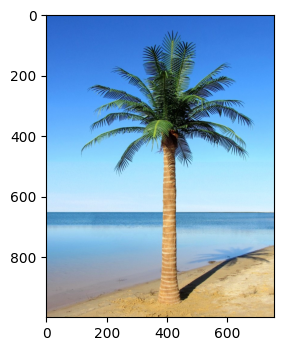

In [ ]:
# Read in the background image 
img_bkgrd, bkgrd_path, bkgrd_filename = pcv.readimage(filename="/content/plantimg/coco.jpg")


In [ ]:
def options():
    parser = argparse.ArgumentParser(description="Imaging processing with opencv")
    parser.add_argument("-i", "--image", help="Input image file.", required=True)
    parser.add_argument("-o", "--outdir", help="Output directory for image files.", required=False)
    parser.add_argument("-r","--result", help="result file.", required= False )
    parser.add_argument("-w","--writeimg", help="write out images.", default=False, action="store_true")
    parser.add_argument("-D", "--debug", help="can be set to 'print' or None (or 'plot' if in jupyter) prints intermediate images.", default=None)
    args = parser.parse_args()
    return args


In [ ]:
def main():
    # Get options
    args = options()

    pcv.params.debug=args.debug #set debug mode
    pcv.params.debug_outdir=args.outdir #set output directory

    # Read image (readimage mode defaults to native but if image is RGBA then specify mode='rgb')
    # Inputs:
    #   filename - Image file to be read in 
    #   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', 'envi', or 'csv'
    img, path, filename = pcv.readimage(filename=args.image, mode='rgb')

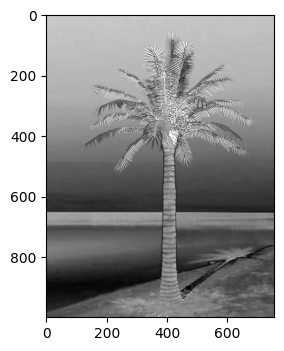

In [ ]:
 s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

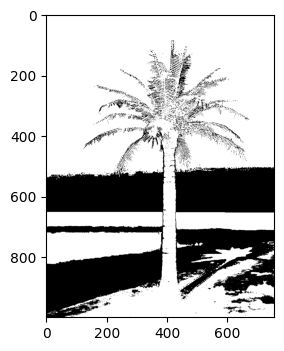

In [ ]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

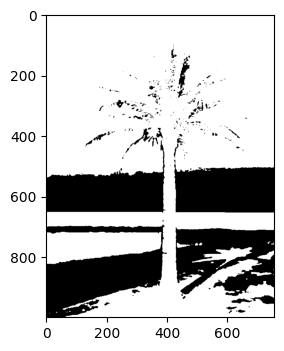

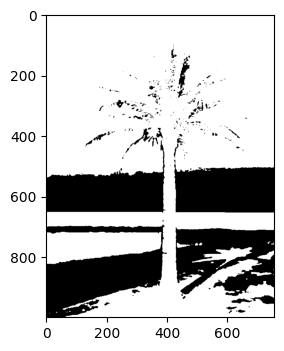

In [ ]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
s_cnt = pcv.median_blur(gray_img=s_thresh, ksize=5)

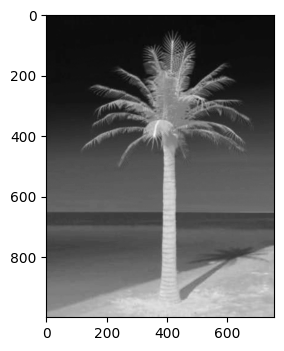

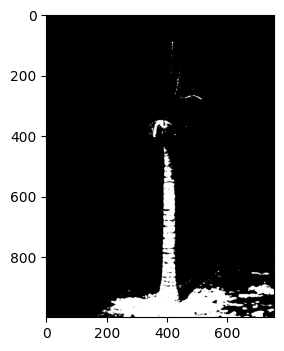

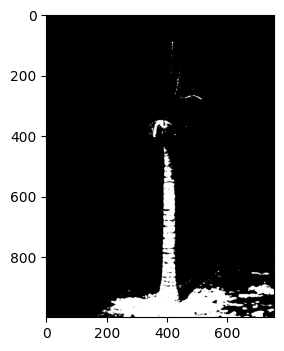

In [ ]:
# Convert RGB to LAB and extract the Blue channel

    # Input:
    #   rgb_img - RGB image data 
    #   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

    # Threshold the blue image
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                    object_type='light')
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                 object_type='light')

    # Fill small objects (optional)
    #b_fill = pcv.fill(b_thresh, 10)


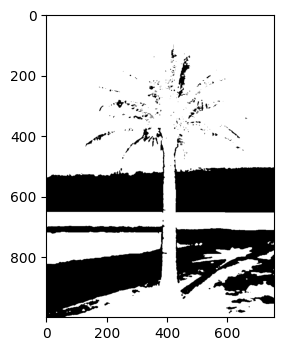

In [ ]:
    # Join the thresholded saturation and blue-yellow images

    # Inputs: 
    #   bin_img1 - Binary image data to be compared to bin_img2
    #   bin_img2 - Binary image data to be compared to bin_img1
    bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)

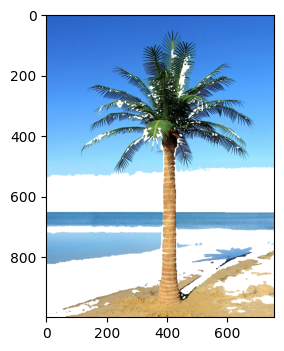

In [ ]:
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white') 

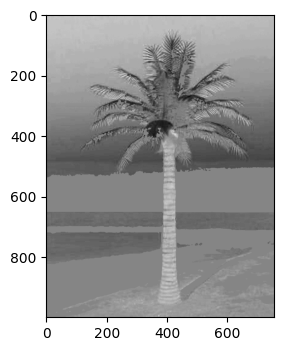

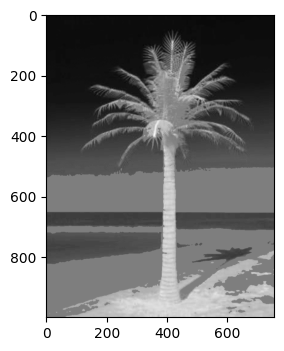

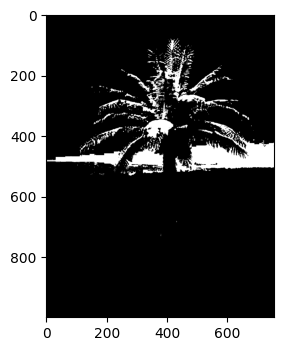

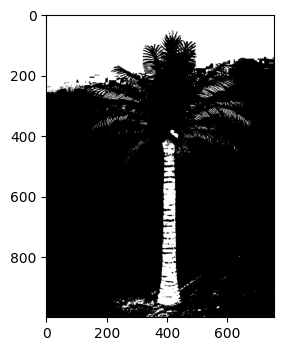

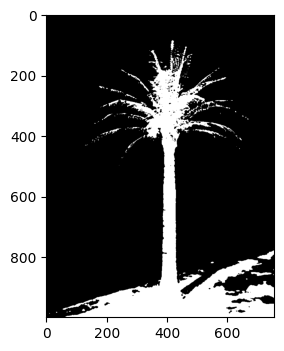

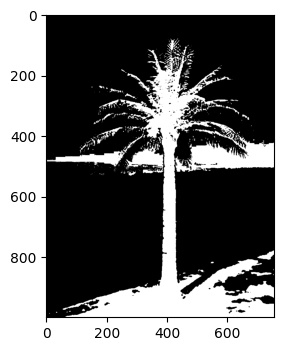

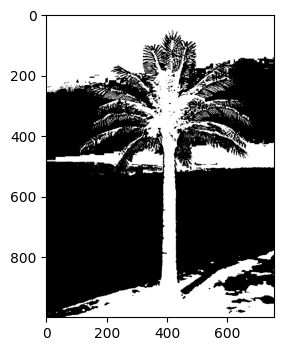

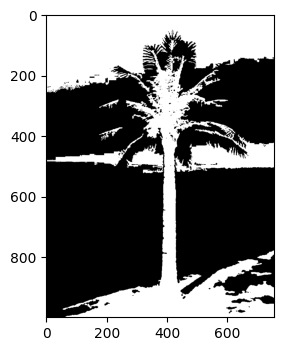

TypeError: ignored

In [ ]:
   # Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

    # Threshold the green-magenta and blue images
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                           max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                          max_value=255, object_type='light')

    # Join the thresholded saturation and blue-yellow images (OR)
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

    # Fill small objects
    # Inputs: 
    #   bin_img - Binary image data 
    #   size - Minimum object area size in pixels (must be an integer), and smaller objects will be filled
ab_fill = pcv.fill(bin_img=ab, size=200)

    # Apply mask (for VIS images, mask_color=white)
masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')


In [ ]:
id_objects, obj_hierarchy = pcv.find_objects(masked2, ab_fill)

NameError: ignored

In [ ]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=100, y=100, h=200, w=200)

NameError: ignored

In [ ]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')


NameError: ignored

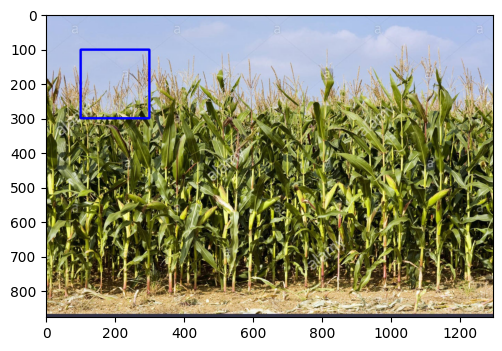

In [ ]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=img, x=100, y=100, h=200, w=200)

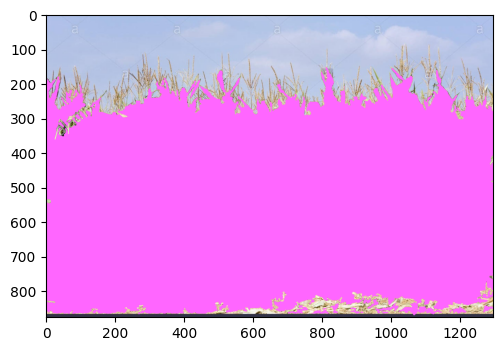

In [ ]:
id_objects, obj_hierarchy = pcv.find_objects(img, ab_fill)

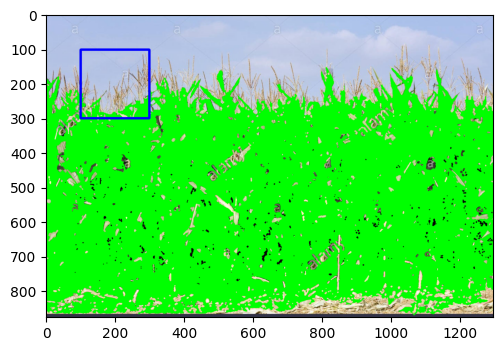

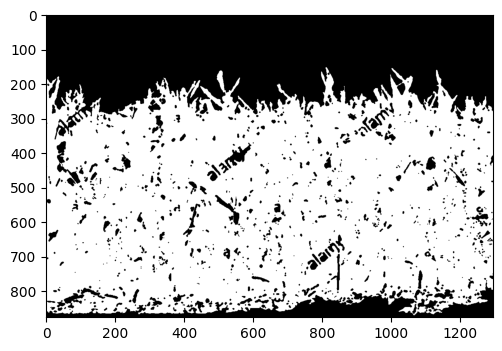

In [ ]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')


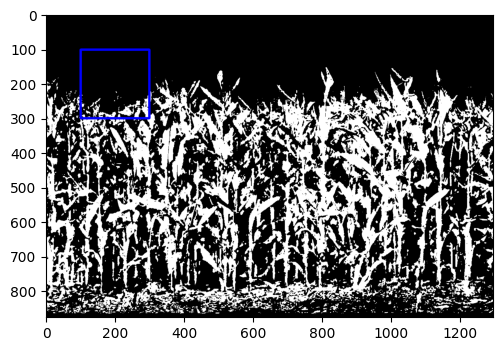

In [ ]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=b_thresh , x=100, y=100, h=200, w=200)

TypeError: ignored